# Cluster Analysis of Particles from an SEM Image

Battery electrode performance is closely related to the distribution of its materials. In this exercise, an electrode contained electron-conducting material, active material, ion-conducting material, and a binder. 

To gain an understanding of the distribution of a component of interest, an SEM image with elemental mapping was acquired. The SEM image of the particles was processed in Fiji (ImageJ) into a binary image (black/white) using image smoothing and autothresholding. 

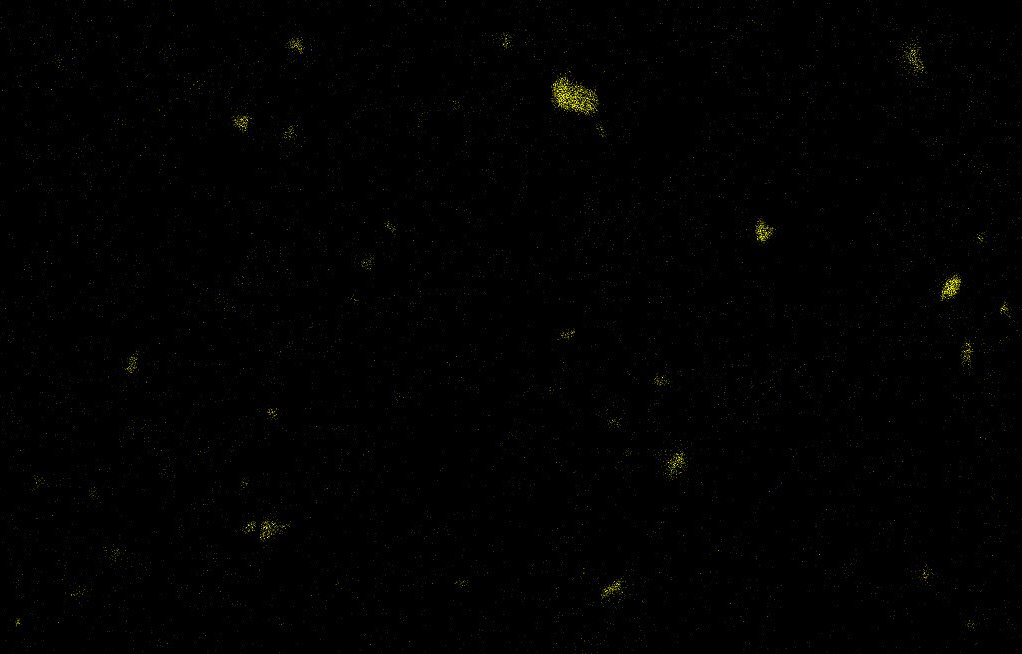

In [1]:
from IPython.display import Image
Image(filename='Element_map.jpg',width=400,height=400)

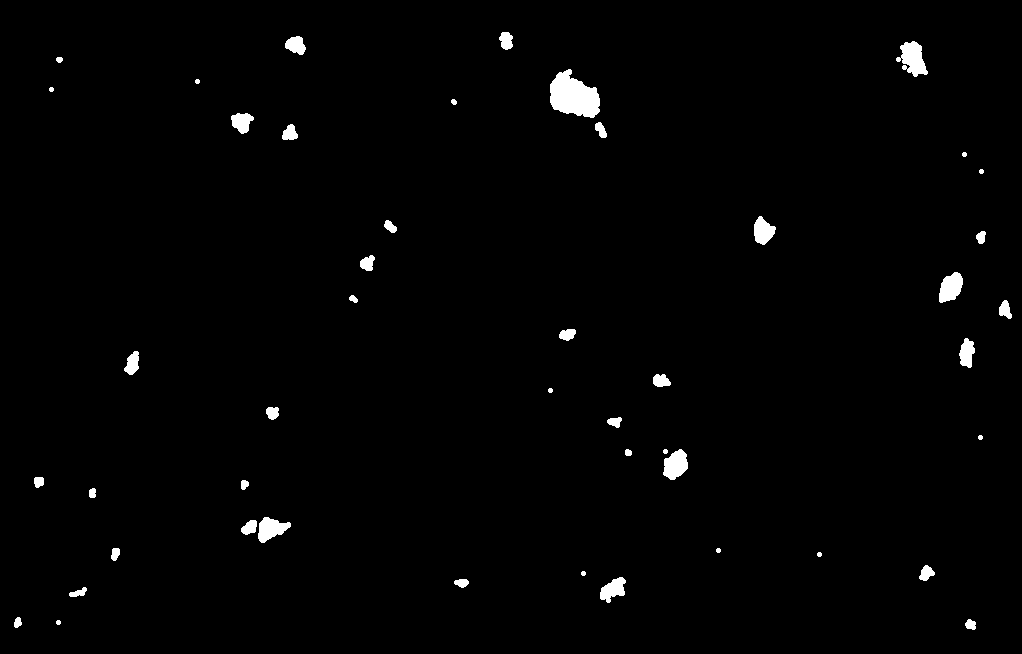

In [2]:
Image(filename='Element_map_binary.png',width=400,height=400)

From the binary image, the position of each particle was output in terms of pixel distance. 
With this dataset, there is interest in understanding how the materials are distributed. Namely, is there clustering? If so, what are the groups of clusters? How big are they? 
Here, I attempt to answer these questions using the KMeans algorithm in scikit learn. 

## Import modules

In [3]:
import pandas as pd
import pprint
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib import rcParams
rcParams['font.family']='sans-serif'
rcParams['font.sans-serif']=['Arial']
size=6

## Define a function to read the data of interest

In [4]:
def opencsv(filename,headerlines):
    '''input: filename is a string indicating the name of the file in the working directory
                    headerlines is of type string to indicate the row with the header columns
    output:  the X and Y positions of the particles as pd.Series'''
    file=pd.read_csv(filename,header=headerlines)
    X=pd.to_numeric(file['BX'],downcast='float',errors='coerce') # units in pixels
    Y=pd.to_numeric(file['BY'],downcast='float',errors='coerce') # units in pixels
    return X,Y

## Define a function to graph the data

In [5]:
def graph(x,y,sym='o'):
    '''input: x and y are pd.Series
                    sym is of type string, it is the symbol of the markers
    output: plot the graph'''
    plt.plot(x,y,sym,color='dodgerblue',markersize=3,linewidth=1,mew=0.5, mec='k')
    return

## Define a function for formatting

In [6]:
def formatGraph():
    ''' formatting conditions for the graph'''
    plt.xlabel('x (pixels)',fontsize=size)
    plt.ylabel('y (pixels)', fontsize=size)
    plt.tick_params(labelsize=size)
    plt.tick_params(which='major',right='on',direction='in',top='on',length=3)
    plt.tick_params(which='minor',right='on',direction='in',top='on',length=1)
    plt.tight_layout()   
    return

## Define the file name and instantiate colors, the list of colors

In [7]:
file='Results.csv'
colors=['royalblue','mediumseagreen','m','lightslategrey','goldenrod']

## Open the data and graph the position of the particles

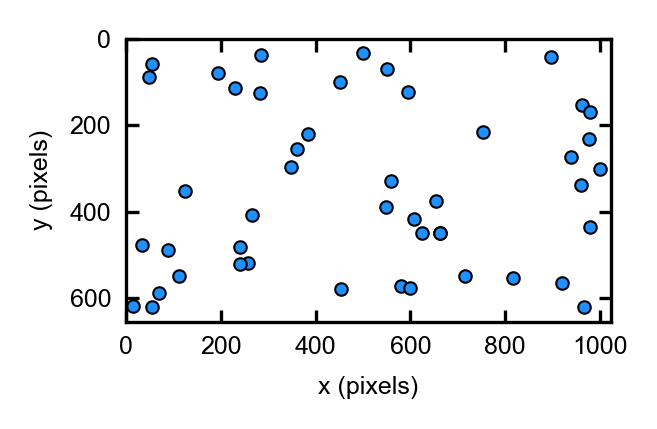

In [8]:
x,y=opencsv(file,0)

fig=plt.figure(figsize=(2.25,1.5),dpi=300)
graph(x,y)
formatGraph()
plt.axis([0,1022,654,0])
plt.savefig('_BxBy_position')
plt.show()

## Convert the x and y pd.Series into a single array of positions

In [9]:
xy=[]
for i in range(len(x)):
    xy.append([x.iloc[i],y.iloc[i]])
xy=np.array(xy)

## Run the KMeans algorithm on a different number of clusters, cluster_num

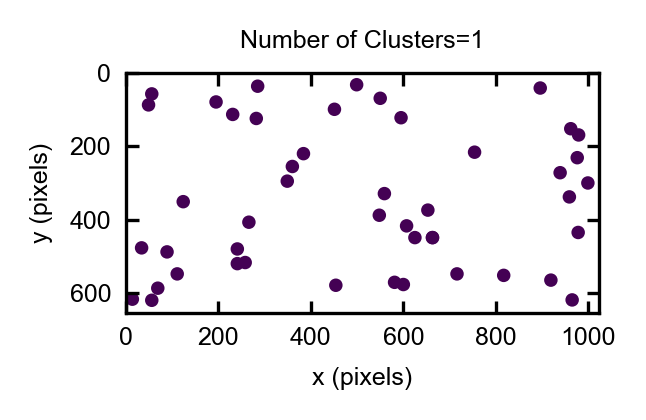

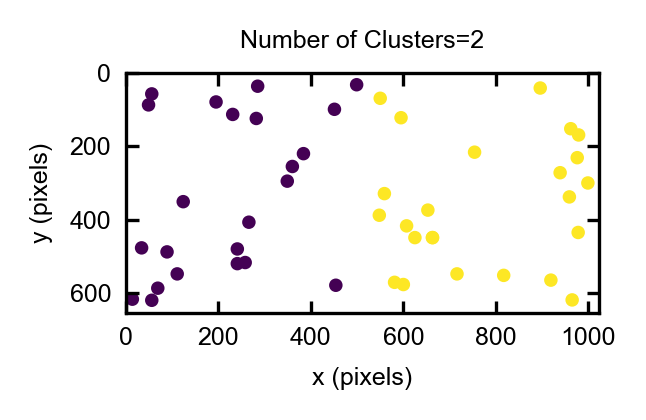

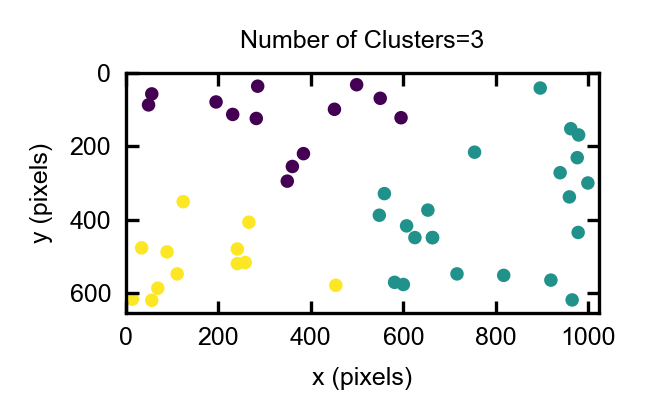

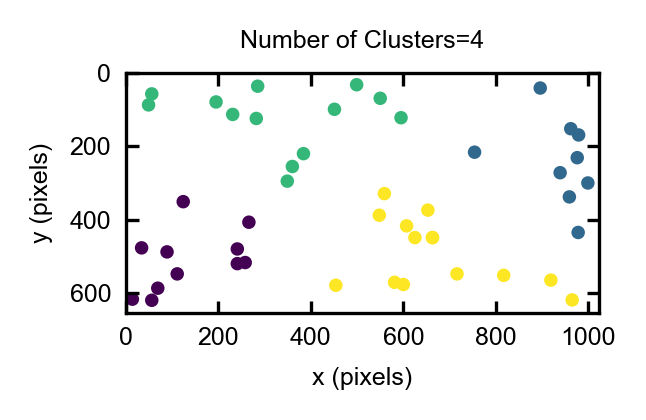

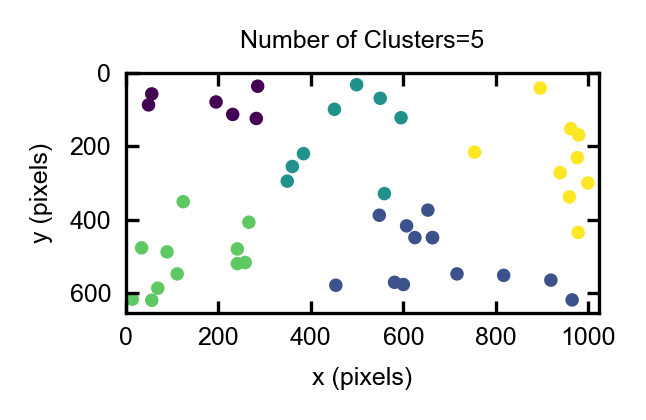

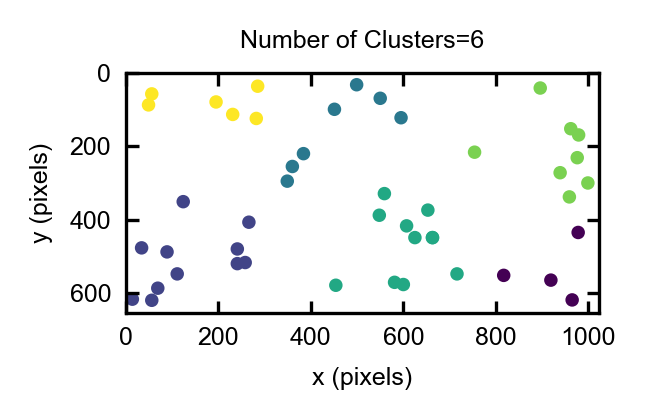

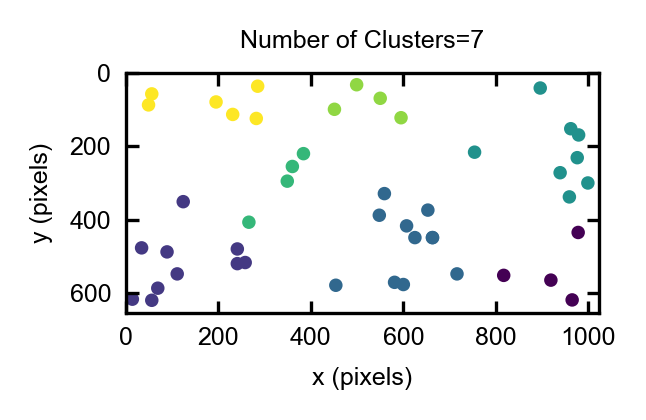

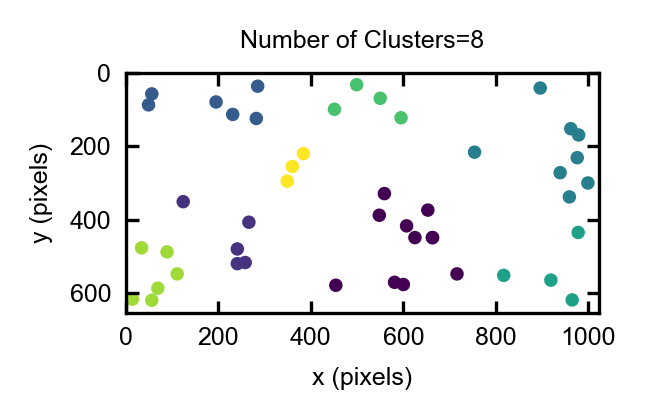

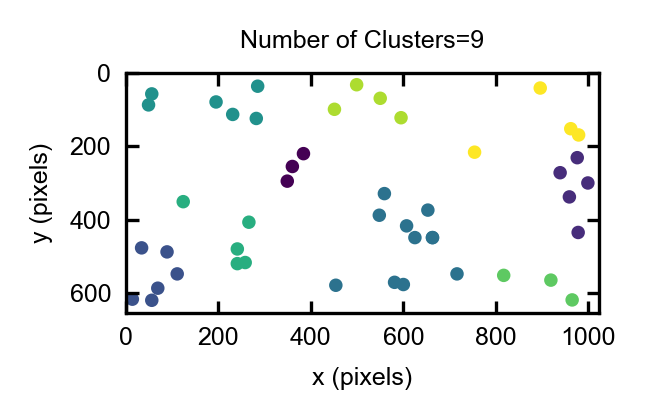

In [10]:
variation=[]
##random_state=0, for a deterministic output
for cluster_num in range(1,10):
    kmeans = KMeans(n_clusters=cluster_num, random_state=None).fit(xy)
    #
    fig=plt.figure(figsize=(2.25,1.5),dpi=300)
    plt.scatter(xy[:, 0], xy[:, 1], s=5,c=kmeans.labels_)
    plt.axis([0,1022,654,0])
    plt.title('Number of Clusters='+str(cluster_num),fontsize=size)
    formatGraph()
    #
    variation.append(kmeans.inertia_)
plt.show()

Based on the outputs, one can observe the clusters that the algorithm determined. 
The clusters proposed appear reasonable, but it is helpful to quantify how good each proposed cluster is.  Therefore, it is helpful to track the total variation of the clusters proposed, also known as the Inertia. 

## Graph the Inertia versus the number of clusters proposed

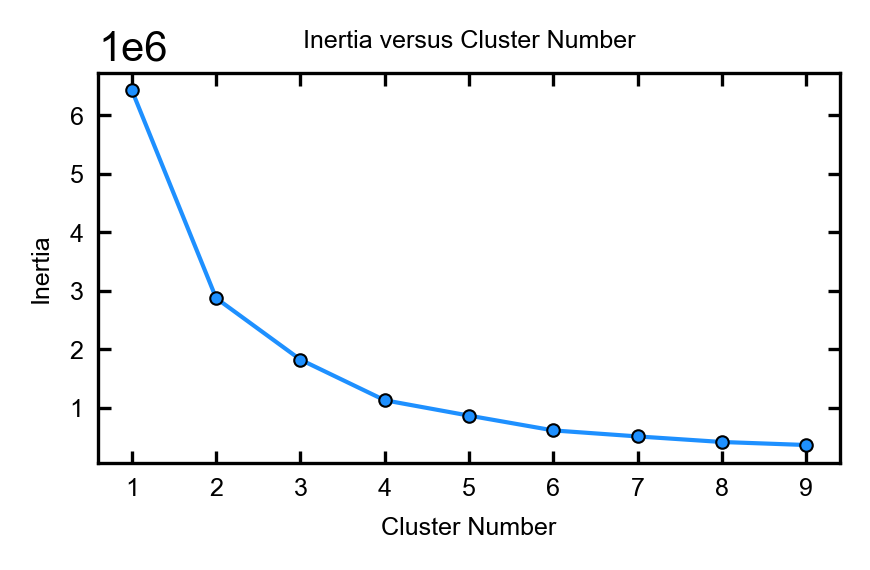

In [11]:
fig=plt.figure(figsize=(3,2),dpi=300)
graph(range(1,10),variation,sym='o-')
formatGraph()
plt.xlabel('Cluster Number')
plt.ylabel('Inertia')
plt.title('Inertia versus Cluster Number',fontsize=size)
plt.show()

With the increase of cluster number, the variation decreases.  However, the variation appears to plateau.  
It may be more helpful to observe the change in Inertia. 

## Calculate the change in Inertia, and graph it against the number of clusters

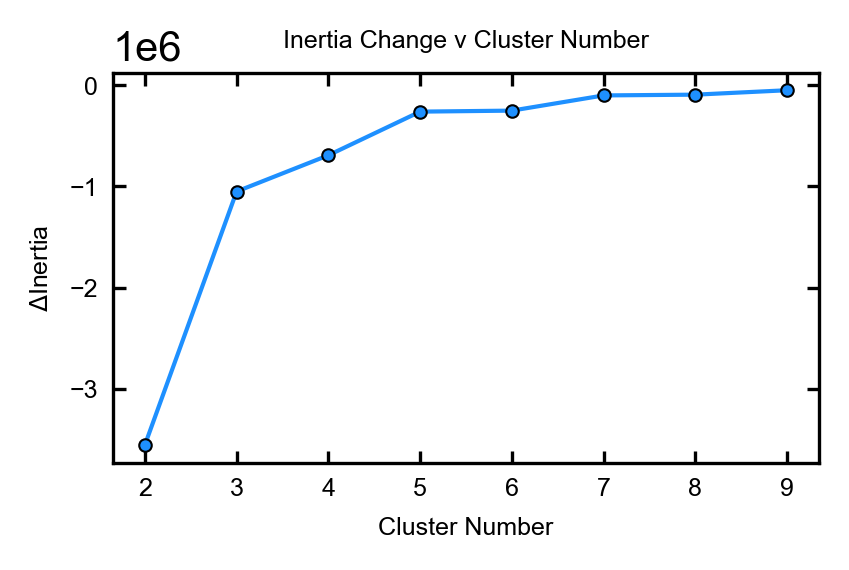

In [12]:
delta_var=[]
for i in range(len(variation)-1):
    delta_var.append(variation[i+1]-variation[i])
fig=plt.figure(figsize=(3,2),dpi=300)
graph(range(2,10),delta_var,sym='o-')
formatGraph()
plt.xlabel('Cluster Number')
plt.ylabel('$\Delta$Inertia')
plt.title('Inertia Change v Cluster Number',fontsize=size)
plt.show()

Based on the change in inertia, one could more easily observe that after k=5 clusters, the change in variation is not as substantial.  Therefore, we can say that k=5 clusters may be an appropriate number of clusters for this image.